##### **Introduction to Deep Learning with Keras**

Keras is a powerful and easy to use open-source python library for developing and evaluating deep learning models. Keras is the official high level API of TensorFlow.<br>
**Keras features:**<br>
* Keras focuses on user experience. It is easy to learn and easy to use. Its ease of use does not come at the cost of reduced flexibility.<br>
* Keras is muti-backend, multi-platform library.

In this tutorial we will be learning how to create a simple neural network (MLP) using keras. We will also try to learn how to train our network.

##### **Importing necessary libraries**

In [1]:
import keras
from keras import layers
from keras.utils import to_categorical
import numpy as np

##### **Loading Data**
We will be loading mnist dataset directly from keras.datasets for this tutorial.

In [2]:
# Loading MNIST dataset from keras.datasets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# reshape dataset to have a single channel:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# normalize the pixel values
X_train = np.array(X_train, dtype='float') / 255.0
X_test = np.array(X_test, dtype='float') / 255.0


Let's visualize some images from our dataset.

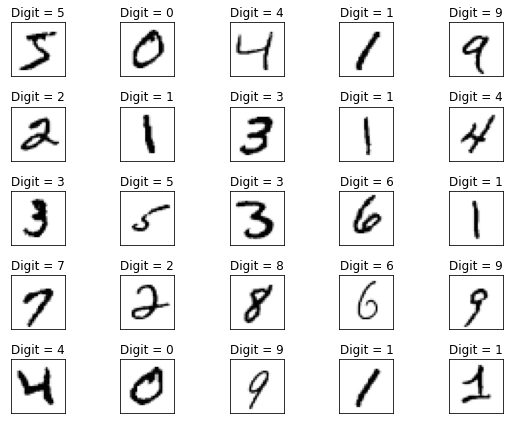

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8,6))

num=0
for i in range(5):
    for j in range(5):
        img = X_train[num].reshape(28,28)
        ax[i][j].imshow(img, cmap='Greys')
        ax[i][j].set_title('Digit = {}'.format(y_train[num]))
        num += 1
        
ax[0][0].set_yticks([])
ax[0][0].set_xticks([])
plt.tight_layout()
plt.show()

Class labels of each image will be one hot encoded in order to use softmax layer at the end of our neural network

In [4]:
# use a one hot encoding for class element of each sample
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# view few examples of how original label changed to one hot encoded
for i in range(5):
    print("Original label: {0} --- One hot encoded: {1}".format(y_train[i].argmax(), y_train[i]))

Original label: 5 --- One hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Original label: 0 --- One hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Original label: 4 --- One hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Original label: 1 --- One hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Original label: 9 --- One hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


##### **Defining a Neural Network Model**
We will now build a sequential model and add layers to it. A sequential model can be created by passing a list of layers to a constructor or by calling an instance and then using the .add()

In [5]:
from keras.models import Sequential
model = Sequential()

**Adding layers**<br>
To add a layer we can use `.add()` function. <br>

`Dense` is used to connect our neural network.

**Input Layer** <br>
The first layer must receive information about the size of the input layer.

Initialization and activation functions can be declared for each layer.

Initializations define the probability distribution used to set the initial random weights of Keras layers.

**MLP** <br>
A uniform distribution is chosen for initialising the random weights, hyperbolic tangent activation function is chosen for layers one and two. This produces an output in the range [-1,1]. The final layer uses a softmax activation function, the output of the final layer must of course be equal to the number of classes in the data.


In [6]:
from keras.layers import Dense
from keras.optimizers import SGD

model.add(keras.Input(shape=(28, 28, 1)))

model.add(layers.Flatten())  # this will convert the 2d array into a 1d array
                             # because we want to create a MLP
model.add(Dense(units=768, kernel_initializer='uniform', activation='tanh'))

model.add(Dense(units=384, kernel_initializer='uniform', activation='tanh'))

model.add(Dense(units=y_train.shape[1], activation='softmax'))


Let's view our model's summary:

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 768)               602880    
_________________________________________________________________
dense_1 (Dense)              (None, 384)               295296    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3850      
Total params: 902,026
Trainable params: 902,026
Non-trainable params: 0
_________________________________________________________________
None


##### **Compiling Our Model** <br>
After building our model, the next step is to compile the model. Compilation configures the learning process. Three arguments are required for compilation.
1. An optimizer
2. A loss function
3. metrics: Choice of metrics can be passed as a list of strings.

**Optimization:** <br>
The chosen method of optimization for this model is Stochastic Gradient Descent. Keras supports numerous optimizers, SGD can take learning rate, decay, momentum and Nesterov args. <br>
The keyword argument `metrics` takes a  list of metrics to be evaluated by the model during training and testing. We are using accuracy to evaluate the model.

In [8]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9, nesterov=False)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

##### **Training the Model** <br>
We will train our model using `.fit()` function. <br>
`validation_split`: Fraction of the training data to be used as validation data.

In [9]:
H = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.5468 - accuracy: 0.8594 - val_loss: 0.2884 - val_accuracy: 0.9202
Epoch 2/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3300 - accuracy: 0.9065 - val_loss: 0.2563 - val_accuracy: 0.9263
Epoch 3/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3003 - accuracy: 0.9141 - val_loss: 0.2377 - val_accuracy: 0.9323
Epoch 4/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2818 - accuracy: 0.9192 - val_loss: 0.2280 - val_accuracy: 0.9363
Epoch 5/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2668 - accuracy: 0.9239 - val_loss: 0.2157 - val_accuracy: 0.9387
Epoch 6/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2526 - accuracy: 0.9285 - val_loss: 0.2043 - val_accuracy: 0.9440
Epoch 7/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2388 - accuracy: 0.9321 - val_loss: 0.1941 - val_ac

Let's see the learning curve.

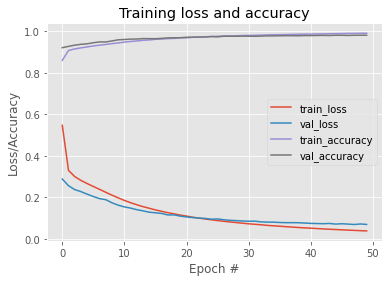

In [11]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

##### **Evaluating the trained Model**

In [12]:
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9763
Test Loss =  0.0747847780585289
Test Accuracy =  0.9763000011444092


**Confusion Matrix:** It shows how many of the test samples are predicted correctly and how many are not. For example the first row shows that 968 samples of `class 0` were correctly predicted, 1 sample was predicted as `class 2` and so on. 

In [14]:
'''CONFUSION MATRIX'''
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
print(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)))

[[ 968    0    1    3    1    2    2    1    1    1]
 [   0 1124    2    2    0    1    2    1    3    0]
 [   3    0 1005    3    1    0    4    6   10    0]
 [   0    0    1  994    0    3    0    5    4    3]
 [   0    0    4    1  957    0    2    3    2   13]
 [   4    1    0   13    2  858    6    1    5    2]
 [   7    2    0    1    4    4  936    0    4    0]
 [   1    4    6    5    0    0    0 1004    3    5]
 [   2    1    4    8    2    4    2    5  943    3]
 [   3    4    0    8    8    4    0    7    1  974]]


That's it for this tutorial. In this tutorial we learnt how to build a simple Multi-Layer Perceptron (MLP) using keras, how to train it and evaluate. Next we will learn how to build a Convolutional Neural Network. Thanks.